In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [33]:
df = pd.read_csv('concrete_data.csv')

In [34]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [36]:
df.shape

(1030, 9)

In [37]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**The data set has some values as 0 therefore Box-Cox can not be applied unless we deal with 0s**

In [38]:
x = df.drop(['Strength'],axis=1)

In [39]:
y=df['Strength']

In [40]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [41]:
y

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Applying Regression without any transformation**

In [43]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.4231704797890976

**Cross validation to check the prediction is correct or not**

In [44]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.46099404916628606

**Distplot without transformation**

<ipython-input-45-abc331490b2a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-45-abc331490b2a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-45-abc331490b2a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed 

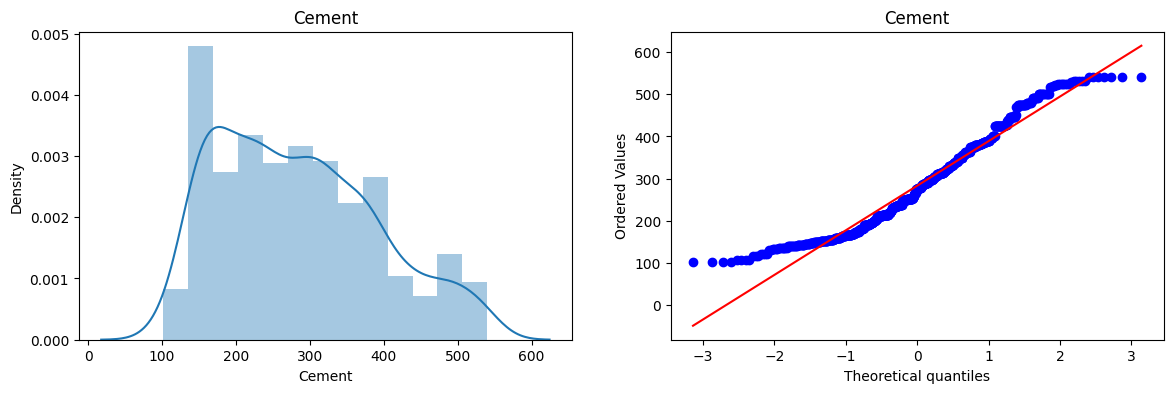

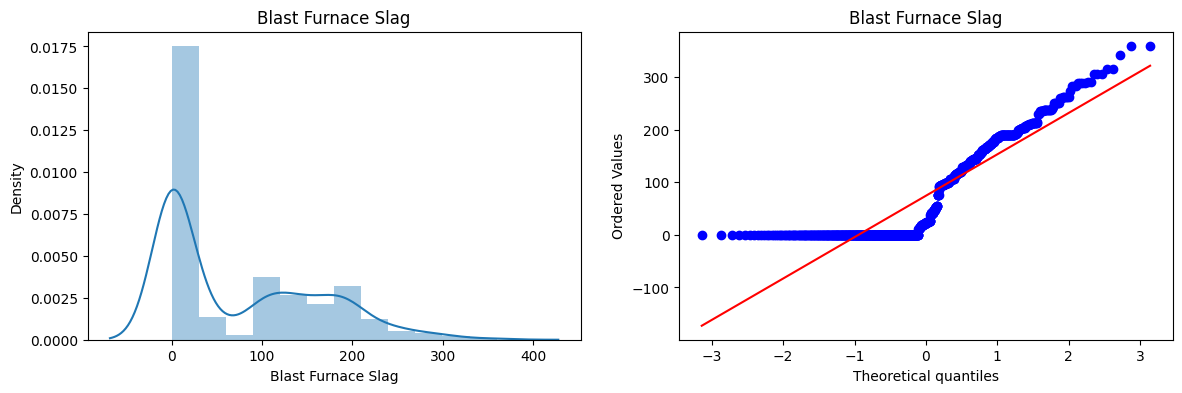

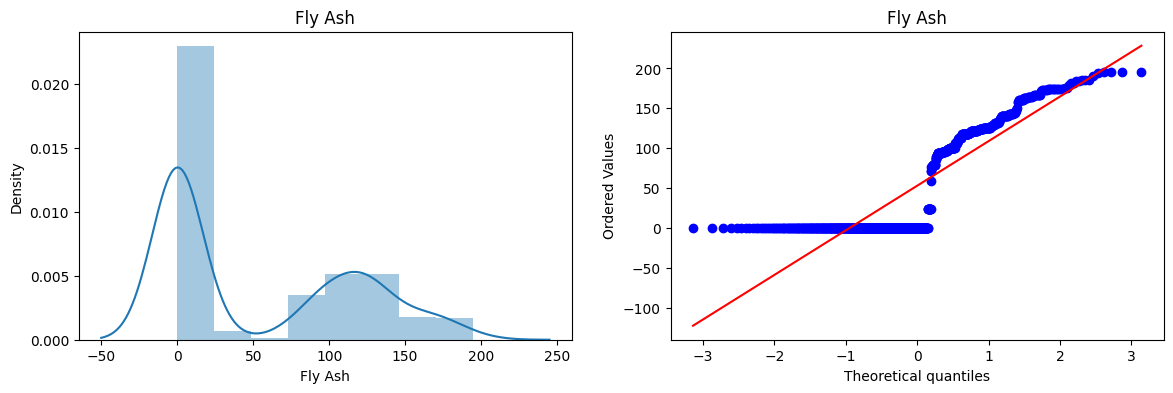

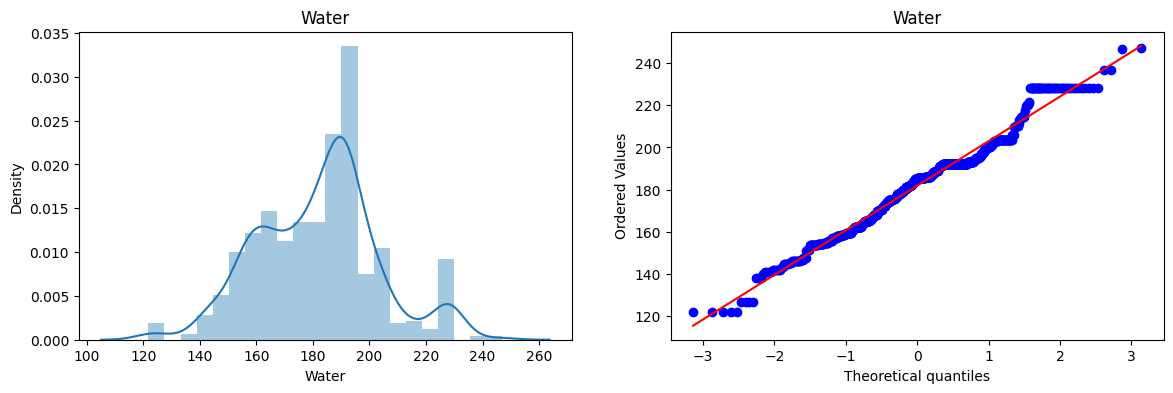

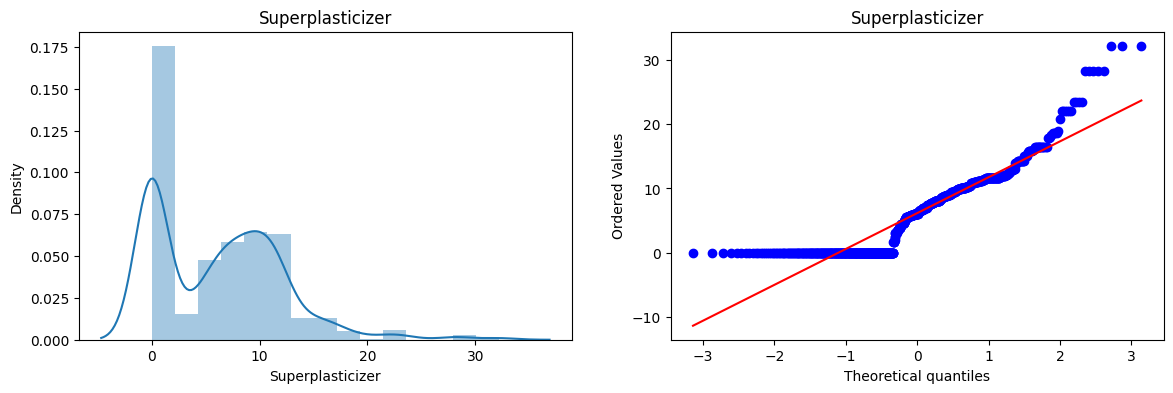

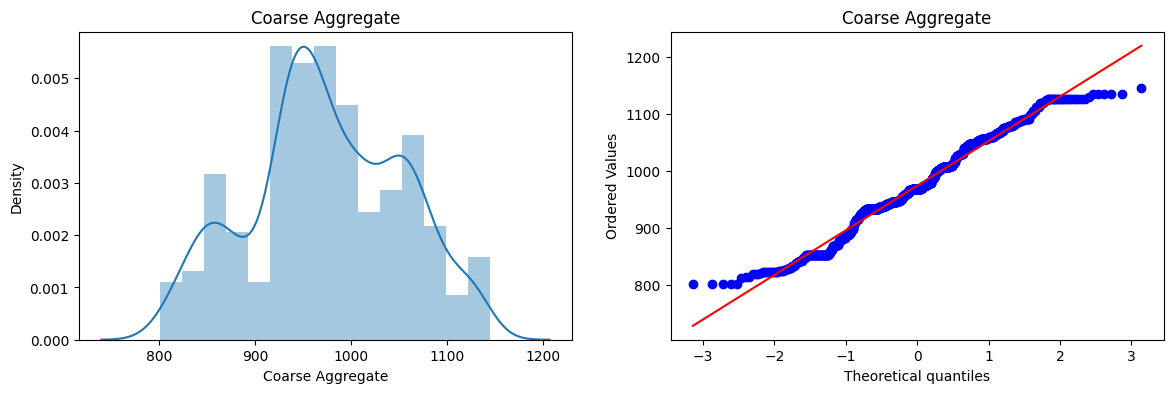

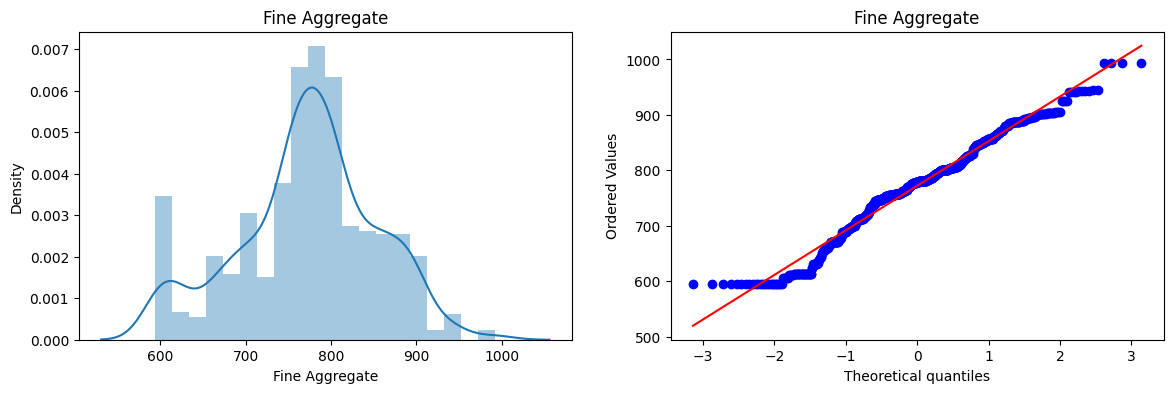

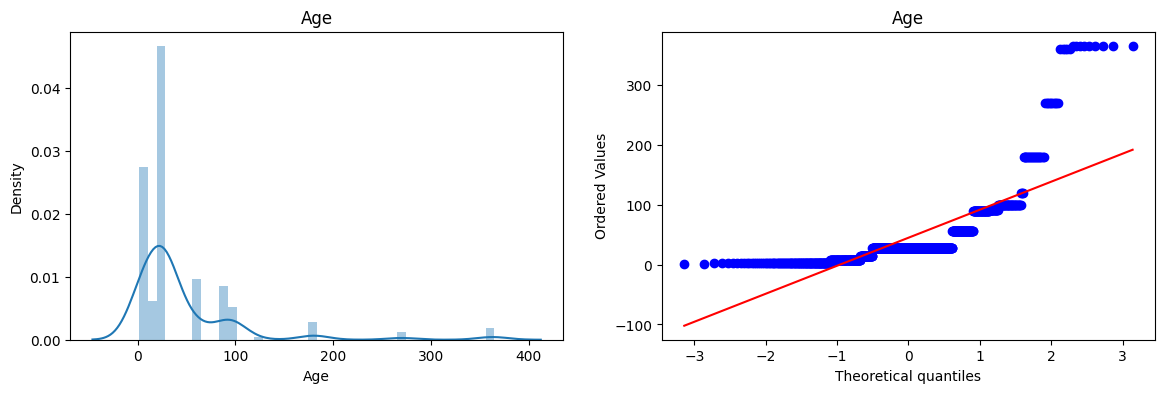

In [45]:
for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(x_train[col], dist="norm", plot=plt)
  plt.title(col)

**blast furnance slag is right skewed**

**fly ash is bi-model**

**superplasticizer is also right skewed and bi-model**

**age is in worst condition**

# **Scaling the data to increase the models performance**

In [48]:
scler = MinMaxScaler()
x_train_scaled = scler.fit_transform(x_train)
x_test_scaled = scler.fit_transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x.columns)

In [49]:
x_train_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.129224,0.414302,0.594872,0.425719,0.465839,0.442733,0.315354,0.074176
1,0.735160,0.061213,0.676923,0.448882,0.263975,0.061047,0.391370,0.074176
2,0.395205,0.000000,0.622564,0.301118,0.307453,0.734302,0.460361,0.005495
3,0.342466,0.269894,0.389744,0.576677,0.248447,0.098837,0.569493,0.074176
4,0.152740,0.117418,0.637436,0.291534,0.335404,0.813372,0.507275,0.005495


In [50]:
lr = LinearRegression()

lr.fit(x_train_scaled,y_train)

y_pred = lr.predict(x_test_scaled)
r2_score(y_pred,y_test)*100

44.27958716679501

**Applying Box-Cox transformer**

In [52]:
x_train.sample(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
297,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56
451,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,56


In [73]:
pt = PowerTransformer()

x_train_trans = pt.fit_transform(x_train+0.000001) # adding a small value as box-cox will not work in 0 values
x_test_trans = pt.fit_transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns, 'box-cox_lambdas':pt.lambdas_})
# calculating lambda for every column

,cols,box-cox_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [56]:
lr = LinearRegression()

lr.fit(x_train_trans,y_train)

y_pred = lr.predict(x_test_trans)
r2_score(y_pred,y_test)*100

79.12737018604561

In [58]:
pt = PowerTransformer(method='box-cox')
x_trans = pt.fit_transform(x+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_trans,y,scoring='r2'))*100

66.62950324463968

In [62]:
x_train_trans = pd.DataFrame(x_train_trans, columns=x_train.columns)

**Plotting befor and after transformation**

<ipython-input-64-be1b06e217b8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-64-be1b06e217b8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trans[col])
<ipython-input-64-be1b06e217b8>:4: UserWarning: 

`distplot` is a deprecated function and will be re

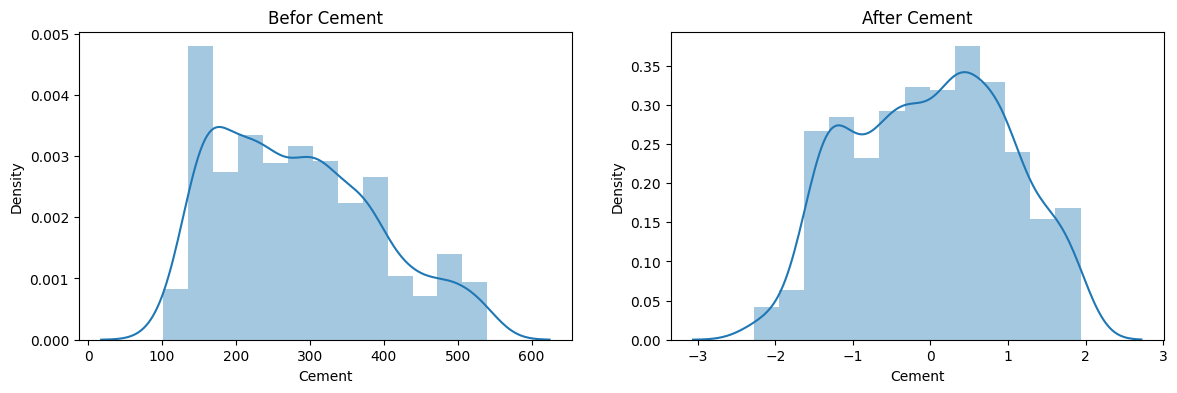

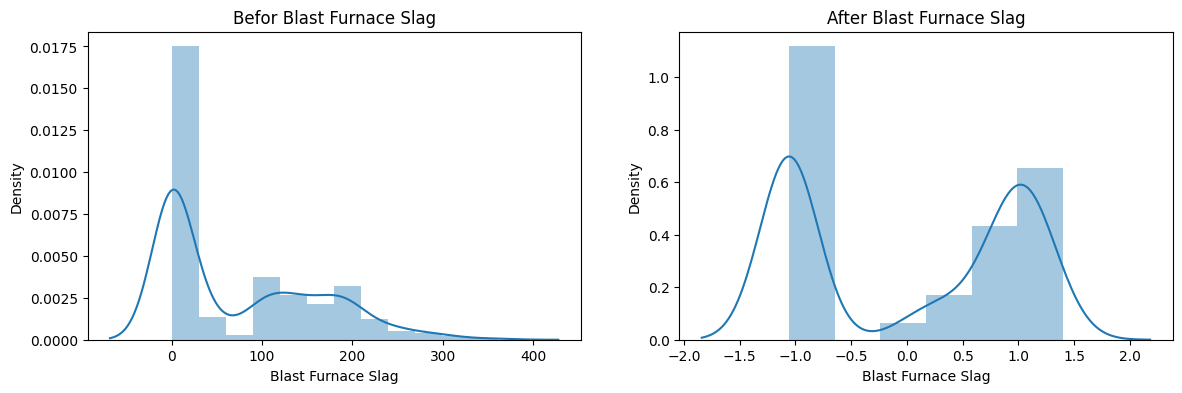

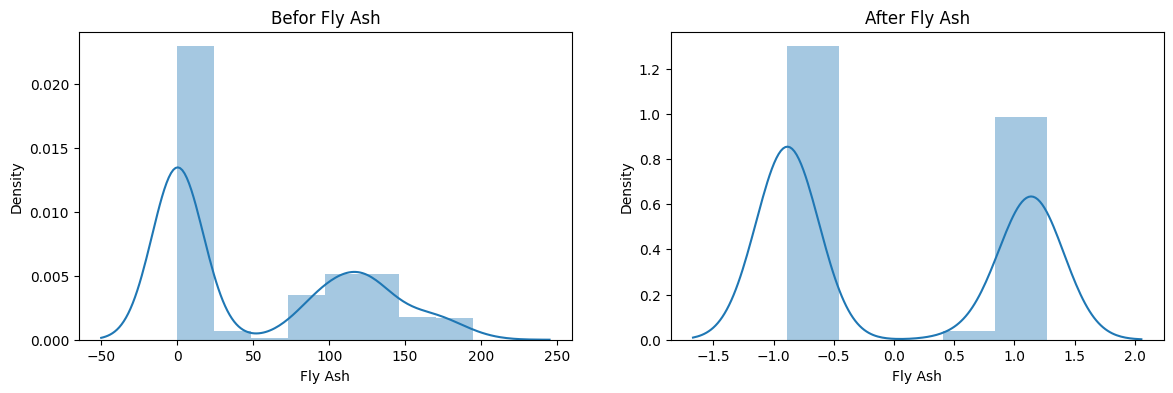

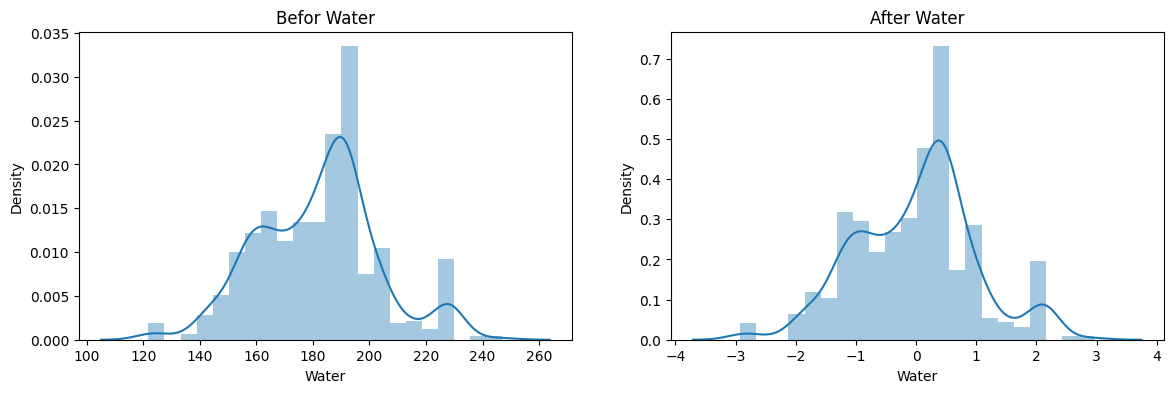

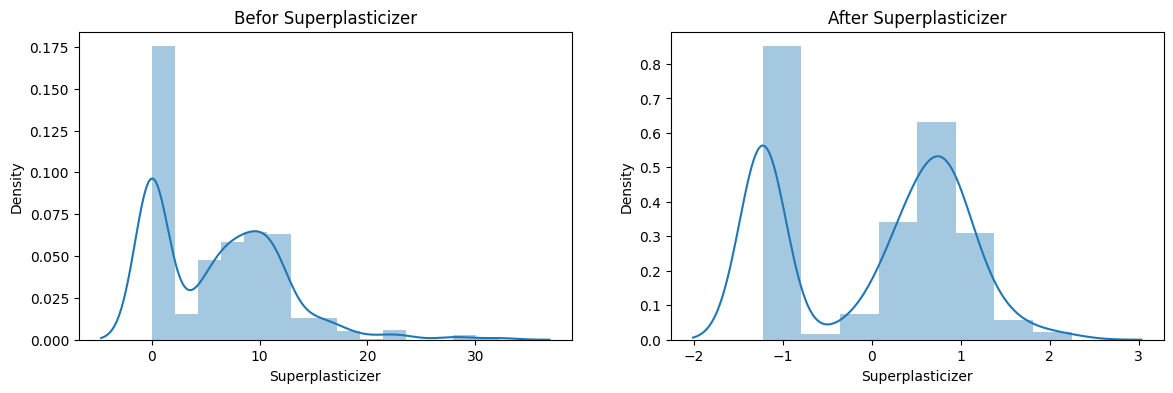

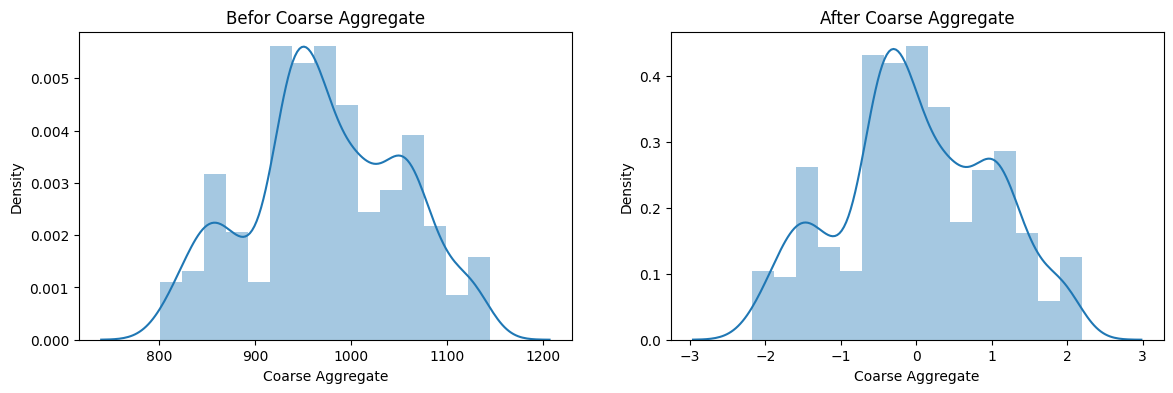

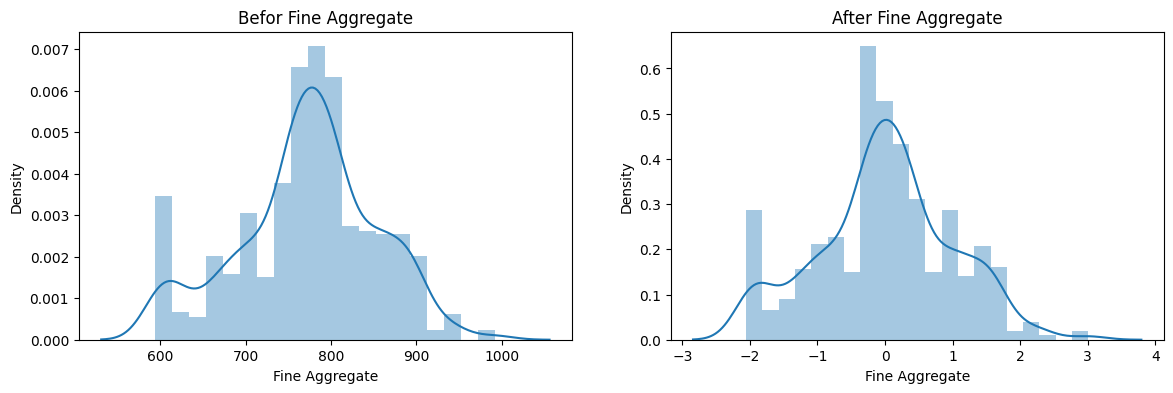

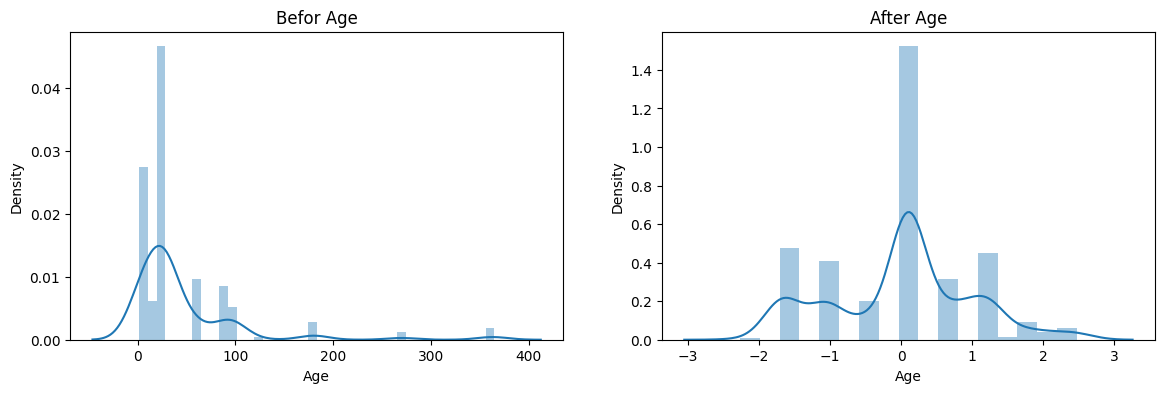

In [64]:
for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(f"Befor {col}")

  plt.subplot(122)
  sns.distplot(x_train_trans[col])
  plt.title(f"After {col}")

**Applying Yoe-Johnson**

In [67]:
pt1 = PowerTransformer()

x_train_trans2 = pt1.fit_transform(x_train)
x_test_trans2 = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_trans2,y_train)
y_pred = lr.predict(x_test_trans2)
r2_score(y_pred,y_test)*100

79.1273699149832

In [68]:
pd.DataFrame({'cols':x_train.columns, 'Yoe-Johnson_lambdas':pt1.lambdas_})
# calculating lambda for every column

,cols,Yoe-Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [70]:
pt = PowerTransformer(method='yeo-johnson')
x_trans2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_trans,y,scoring='r2'))*100

66.62950324463968

**Comparing lambdas of both the methods**

In [72]:
pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_,'yeo_johnson_lambdas':pt1.lambdas_})

,cols,box-cox_lambdas,yeo_johnson_lambdas
0,Cement,0.169544,0.213025
1,Blast Furnace Slag,0.016633,0.020476
2,Fly Ash,-0.136480,-0.038218
3,Water,0.808438,0.958936
4,Superplasticizer,0.264160,0.304951
5,Coarse Aggregate,1.129395,1.192751
6,Fine Aggregate,1.830763,1.975085
7,Age,0.001771,-0.062443
